In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
%matplotlib inline

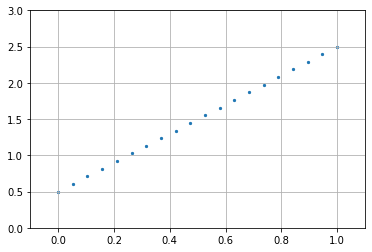

In [2]:
x = np.linspace(0, 1, 20)
m = 2
c = 0.5
y = m * x + c
plt.scatter(x, y, s=5)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

In [3]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

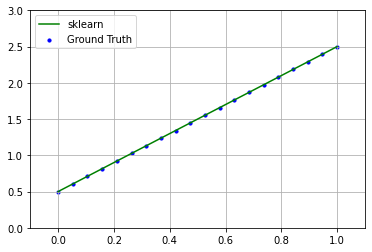

In [4]:
yhat = lr.predict(x.reshape(-1, 1))
plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

In [5]:
lr.coef_

array([2.])

In [6]:
lr.intercept_

0.5000000000000003

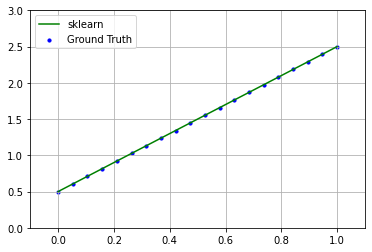

In [7]:
yhat = np.dot(x.reshape(-1, 1), lr.coef_) + lr.intercept_

plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 3])
plt.legend()
plt.grid()

In [8]:
m = 13
c= 1.34
x = np.linspace(0,1,100)
y = m*x+c
lr =LinearRegression()
lr.fit (x.reshape(-1,1),y)
lr.coef_
lr.intercept_

1.3400000000000007

## **Exercise**: Pick a random slope and intercept; and draw a line. Find the correct slope and intercept with sklearn.

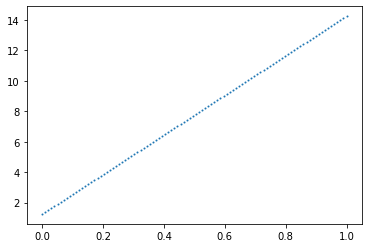

In [9]:
# enter code here
m = 13.000101
c  =1.25
x = np.linspace(0,1,100)
y = m * x + c
plt.scatter(x,y,s=1)

In [10]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
lr.coef_ , lr.intercept_

(array([13.000101]), 1.25)

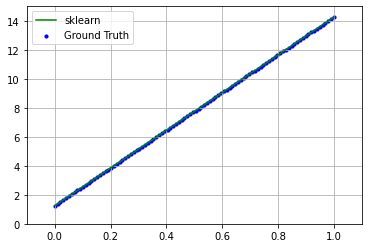

In [11]:
yhat = lr.predict(x.reshape(-1, 1))
plt.scatter(x, y, s=10, c='b', label='Ground Truth')
plt.plot(x, yhat, 'g-', label='sklearn')
plt.axis([-0.1, 1.1, 0, 15])
plt.legend()
plt.grid()


# Multiple Regression with sklearn


In [18]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
y = boston.target
X = boston.data
lr.fit(X, y)

LinearRegression()

In [ ]:
yhat = lr.predict(X)

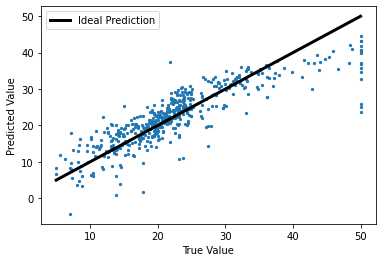

In [ ]:
plt.scatter(y, yhat, s=5)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', linewidth=3, label='Ideal Prediction')
plt.legend()

## Measuring Error

In [ ]:
mean_squared_error(y, yhat)

21.894831181729202

In [ ]:
r2_score(y, yhat)

0.7406426641094095

## Importance of individual features

<AxesSubplot:>

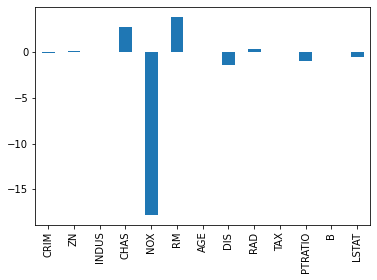

In [ ]:
f_imp = pd.Series(lr.coef_, index=boston.feature_names)
f_imp.plot(kind='bar')

## Exercise: How do we interpret this?

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

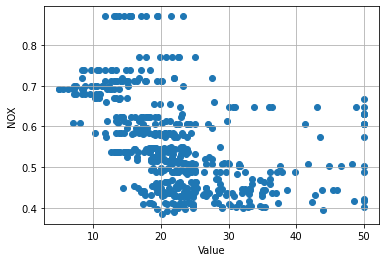

In [ ]:
plt.scatter(y, df['NOX'].values)
plt.xlabel('Value')
plt.ylabel('NOX')
plt.grid()

In [ ]:
nox = df['NOX'].values
y = df['value'].values
lr.fit(nox.reshape(-1, 1), y)
yhat = lr.predict(nox.reshape(-1, 1))

r2_score(y, yhat)

0.182603042501699

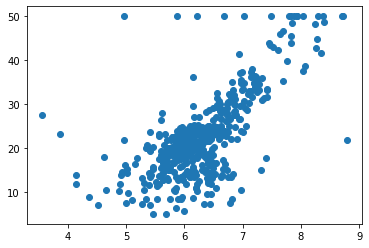

In [ ]:
plt.scatter(df['RM'],df['value'])

<AxesSubplot:xlabel='CHAS', ylabel='value'>

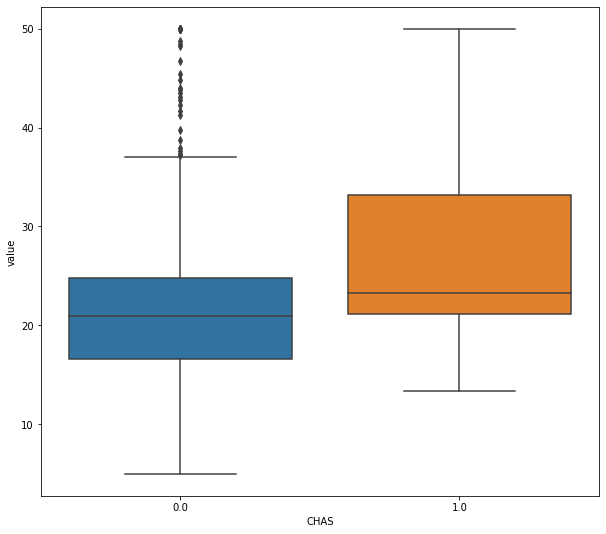

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x= 'CHAS', y= 'value', data = df, ax=ax)


C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


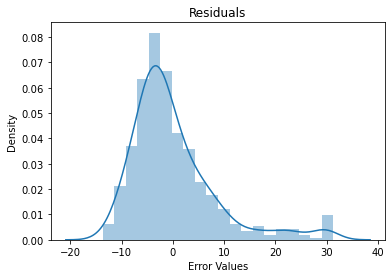

In [ ]:
# histogram of residuals
ax = sns.distplot(y - yhat, bins=20)
ax.set_title('Residuals')
_= plt.xlabel('Error Values')

In [ ]:
lr.coef_

array([-33.91605501])

In [ ]:
# using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# apply scalar to all variables except charles river
num_vars = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [ ]:
x = df[num_vars]
y = boston.target
lr.fit(x,y)

LinearRegression()

<AxesSubplot:>

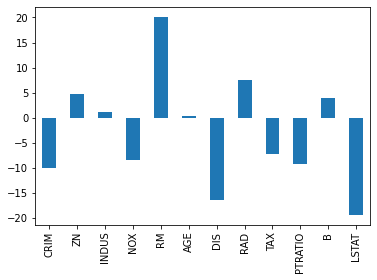

In [ ]:
f_imp = pd.Series(lr.coef_, index=num_vars)
f_imp.plot(kind='bar')

In [ ]:
yhat = lr.predict(x)
r2_score(y, yhat)

0.7355165089722999

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


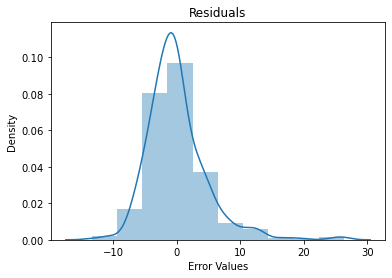

In [ ]:
# histogram of residuals
ax = sns.distplot(y - yhat, bins=10)
ax.set_title('Residuals')
_= plt.xlabel('Error Values')

In [ ]:
Extend the following code snippet, and Identify the r2 score by using NOX and CHAS variables as your predictor variables and value as outcome variable?
#Code starts here
from sklearn import datasets as data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
boston = data.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target



Object `variable` not found.


In [ ]:
df1 = df[['NOX','CHAS']]
x =df1
y = boston.target
lr.fit(x,y)
lr.coef_
yhat = lr.predict(x)
r2_score(y,yhat)

0.22888379517392654

## Cumumlative feature variances

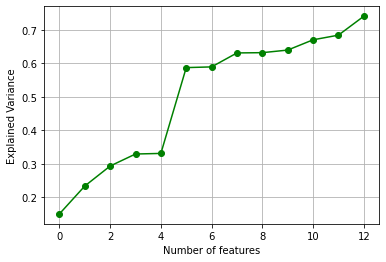

In [54]:
y = boston.target
X = boston.data
variances = []
for i in range(X.shape[1]):
    xx = X[:, :(i + 1)]
    lr.fit(xx, y)
    variances.append(explained_variance_score(y, lr.predict(X[:, :(i + 1)])))

plt.plot(variances, 'go-')
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.grid()

## **Exercise**
### Use the Diabetes dataset (provided below) to fit a linear regression model.
### Rank the features in order of _decreasing_ importance.

In [14]:
diabetest = data.load_diabetes()

In [15]:
diabetest

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [19]:
dfdiab = pd.DataFrame(diabetest.data, columns=diabetest.feature_names)
dfdiab['value'] = diabetest.target
dfdiab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,value
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [21]:
# LR Fit
y = diabetest.target
X = diabetest.data
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [22]:
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [23]:
lr.intercept_

152.1334841628965

In [26]:
# apply scalar to all variables except charles river
num_vars = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5','s6']


<AxesSubplot:>

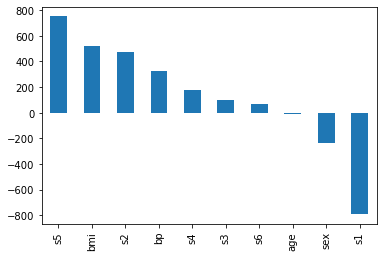

In [35]:
# Variable importance
f_imp = pd.Series(lr.coef_, diabetest.feature_names)
f_imp.sort_values(ascending=False,inplace=True)
f_imp.plot(kind='bar')